## A bit of motivation

Learning to program is an exciting journey! While instructors often begin with basic code examples to simplify concepts, the real magic lies in exploring captivating applications of computing. That's why I'm eager to start this course with coding examples that will spark your curiosity and inspire you to dive into the world of coding.

### Sentiment analysis with a few lines of code

In [1]:
from transformers import pipeline

In [3]:
review = """Despite high expectations, the movie fell short of delivering an engaging plot and compelling 
characters. The storyline felt disjointed, and the pacing was sluggish, leaving me feeling disconnected 
and uninvested in the outcome. Overall, it was a disappointing viewing experience that 
left much to be desired."""

In [5]:
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")
sentiment_pipeline(review)

[{'label': 'NEGATIVE', 'score': 0.9997257590293884}]

In [6]:
review = """"Wow! This movie left me absolutely captivated from start to finish. The plot was brilliantly crafted.
The visuals were stunning, immersing me in breathtaking landscapes and thrilling action sequences. 
This film is an absolute must-see."""

In [7]:
sentiment_pipeline(review)

[{'label': 'POSITIVE', 'score': 0.9998797178268433}]

### Text summarization

In [11]:
text = """Catalonia  Spanish: Cataluña is an autonomous community of Spain, designated as a nationality
by its Statute of Autonomy. Most of its territory lies on the northeast of the Iberian Peninsula,
to the south of the Pyrenees mountain range. Catalonia is administratively divided into four provinces
or eight regions, which are in turn divided into 42 comarques. The capital and largest city, Barcelona,
is the second-most populated municipality in Spain and the fifth-most populous urban area in the European Union.

Modern-day Catalonia comprises most of the medieval and early modern Principality of Catalonia
(with the remainder northern area now part of France's Pyrénées-Orientales). It is bordered by France
(Occitanie) and Andorra to the north, the Mediterranean Sea to the east, and the Spanish autonomous
communities of Aragon to the west and Valencia to the south. In addition to about 580 km of coastline,
Catalonia also has major high landforms such as the Pyrenees and the Pre-Pyrenees,
the Transversal Range (Serralada Transversal) or the Central Depression. The official languages are Catalan,
Spanish and the Aranese dialect of Occitan."""

In [9]:
summarizer = pipeline("summarization", model="google/flan-t5-base",
                      tokenizer="google/flan-t5-base")

In [12]:
summary = summarizer(text, max_length=200, min_length=50, length_penalty=2.0,
                     num_beams=4, early_stopping=True, truncation=True)

# Print the generated summary
print(summary[0]['summary_text'])

Catalonia is an autonomous community of Spain, designated as a nationality by its Statute of Autonomy. It is bordered by France (Occitanie) and Andorra to the north, the Mediterranean Sea to the east, and the Spanish autonomous communities of Aragon


### Automatic image captioning

In [17]:
import cv2
import matplotlib.pyplot as plt 

In [16]:
def read_image(path):
    im = cv2.imread(str(path))
    return cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

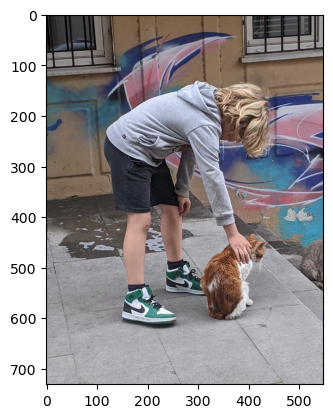

In [18]:
path = "image_x.jpg"
im = read_image(path)
plt.imshow(im)

In [25]:
image_to_text = pipeline("image-to-text")

No model was supplied, defaulted to ydshieh/vit-gpt2-coco-en and revision 65636df (https://huggingface.co/ydshieh/vit-gpt2-coco-en).
Using a pipeline without specifying a model name and revision in production is not recommended.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [26]:
image_to_text(path)

[{'generated_text': 'a person petting a dog on the sidewalk '}]